<a href="https://colab.research.google.com/github/Jnxx02/Jobfit/blob/main/RSIC_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load dataset
df = pd.read_csv('/content/naukri_data_science_jobs_india.csv')

# Menampilkan beberapa baris pertama dataset
df.head()

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."


In [ ]:
# Membersihkan data dan mengisi nilai kosong
df['Skills/Description'] = df['Skills/Description'].fillna('').str.lower()

# Menggunakan TF-IDF untuk mentransformasi teks menjadi fitur
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Skills/Description'])

In [ ]:
# Masukkan skill dan pengalaman
user_skill = "python, Web Developer, Data, Marketing, teacher"
user_experience = 3

# Transform skill kamu menggunakan TF-IDF
user_skill_tfidf = tfidf.transform([user_skill])


In [ ]:
# Convert 'Job Experience' column to numeric, handling non-numeric values
def extract_years_of_experience(experience_str):
    """Extracts years of experience from a string.
    """
    try:
        # If experience is in the format 'x years' or 'x Year'
        if 'year' in experience_str.lower():
            return int(experience_str.lower().split('year')[0].strip())
        # If experience is in the format 'x+' or 'x -'
        elif '+' in experience_str or '-' in experience_str:
            return int(experience_str.split('+')[0].split('-')[0].strip())
        # If experience is already a number
        elif experience_str.isdigit():
            return int(experience_str)
        else:
            return 0 # Handle cases like 'fresher' or other unexpected formats
    except (ValueError, AttributeError):
        return 0 # Handle cases where conversion fails
# Apply the function to the 'Job Experience' column
df['Job Experience'] = df['Job Experience'].apply(extract_years_of_experience)
# Calculate Experience_Diff
df['Experience_Diff'] = abs(df['Job Experience'] - user_experience)

In [ ]:
# Hitung kemiripan skill menggunakan cosine similarity
skill_similarity = cosine_similarity(user_skill_tfidf, tfidf_matrix)

# Tambahkan kolom untuk kesamaan skill dan selisih pengalaman kerja
df['Skill_Similarity'] = skill_similarity.flatten()
df['Experience_Diff'] = abs(df['Job Experience'] - user_experience)

# Sort berdasarkan kesamaan skill dan pengalaman yang mendekati
df_sorted = df.sort_values(by=['Skill_Similarity', 'Experience_Diff'], ascending=[False, True])

# Tampilkan beberapa hasil teratas
df_sorted[['Job_Role', 'Company', 'Location', 'Skill_Similarity', 'Experience_Diff']].head()


,Job_Role,Company,Location,Skill_Similarity,Experience_Diff
462,Senior Python Developer / Data Scientist,Nikah Forever,New Delhi,0.625960,1
4731,"Java/big Data Developer,exempt -- Non Officer,...",Credit Suisse,"Pune, Pune",0.534592,1
1439,"Developers, Data Scientists, Web Designers, An...",Cogmac Technologies,Noida,0.521276,2
8202,Analyst-Digital Marketing Analytics,Accenture,Gurgaon/Gurugram,0.504407,0
2191,Ui Path/Business Analyst RPA/Data Engineers/Pr...,Vibrant Aspirations Private Limited,"Pune, Gurgaon/Gurugram, Bangalore/Bengaluru",0.492751,1


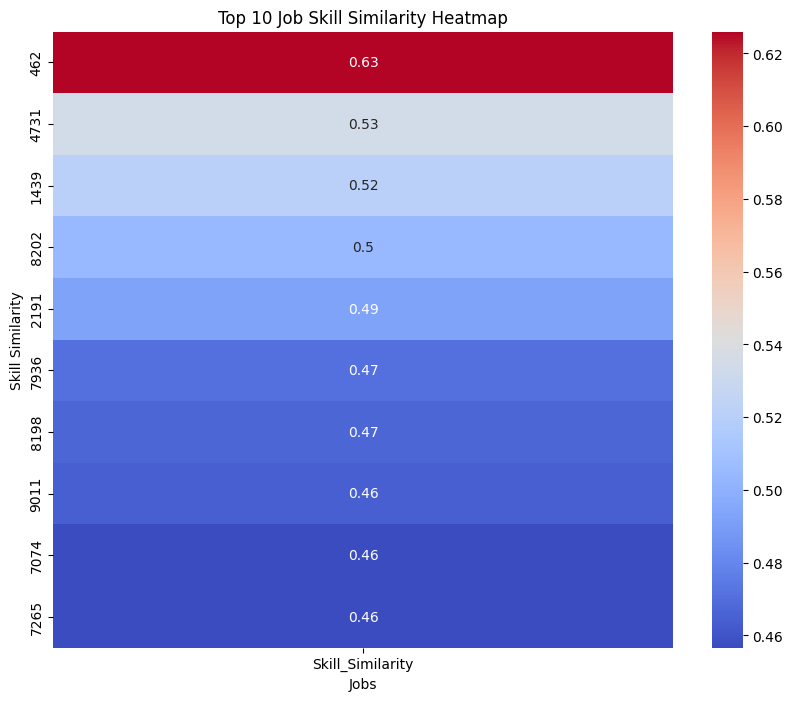

In [ ]:
# Visualisasi heatmap dari 10 job teratas berdasarkan kesamaan skill
top_jobs = df_sorted.head(10)

plt.figure(figsize=(10, 8))
sns.heatmap(top_jobs[['Skill_Similarity']], annot=True, cmap='coolwarm', cbar=True)
plt.title("Top 10 Job Skill Similarity Heatmap")
plt.xlabel("Jobs")
plt.ylabel("Skill Similarity")
plt.show()


<ipython-input-10-e630c9055322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_jobs['Experience_Diff'] = top_jobs['Job Experience'] - user_experience


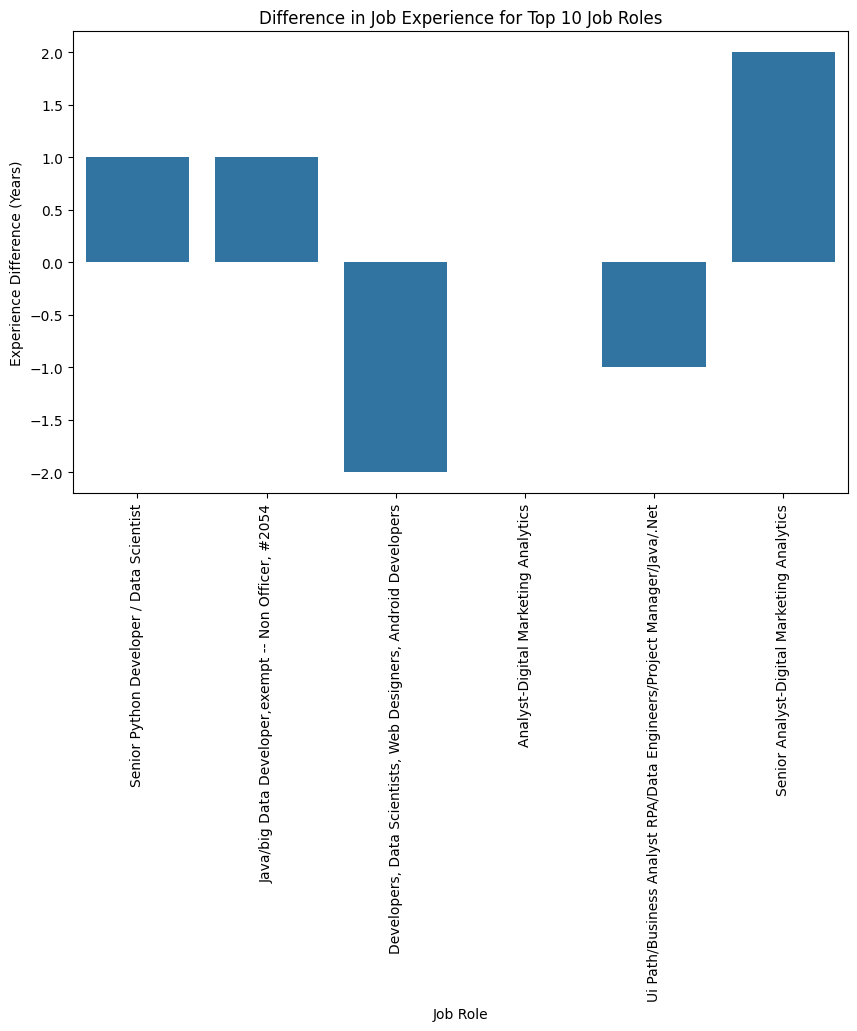

In [ ]:
# Visualisasi perbedaan pengalaman kerja
top_jobs['Experience_Diff'] = top_jobs['Job Experience'] - user_experience

plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Role', y='Experience_Diff', data=top_jobs)
plt.xticks(rotation=90)
plt.title("Difference in Job Experience for Top 10 Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Experience Difference (Years)")
plt.show()


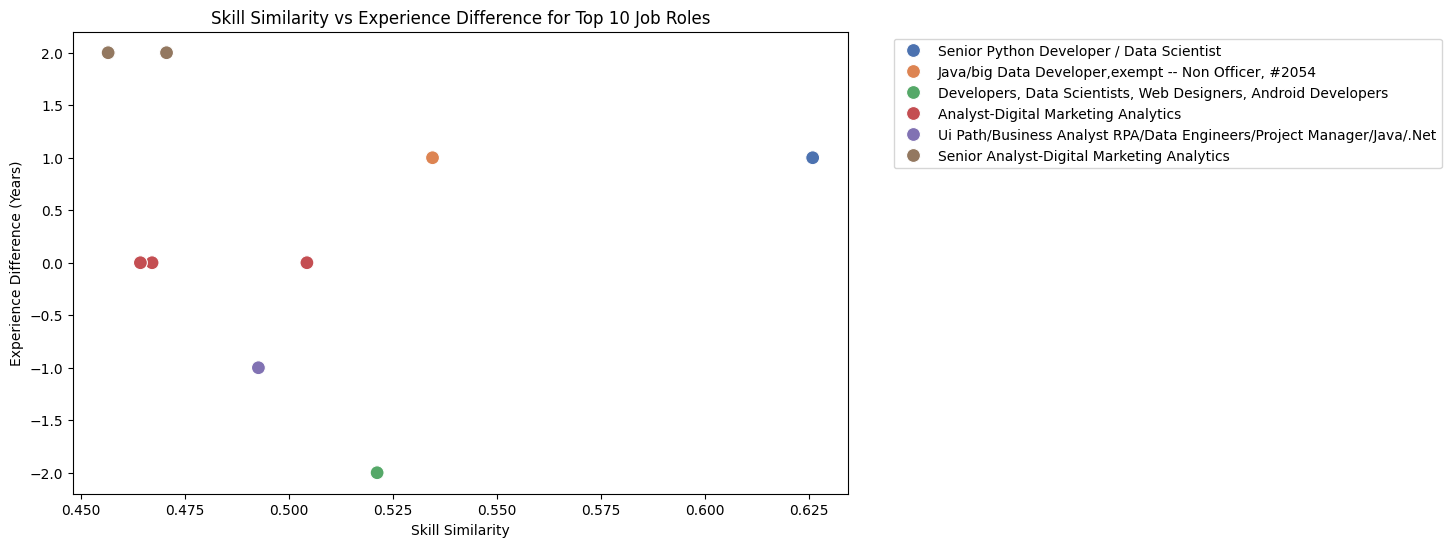

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Skill_Similarity', y='Experience_Diff', hue='Job_Role', data=top_jobs, palette='deep', s=100)
plt.title("Skill Similarity vs Experience Difference for Top 10 Job Roles")
plt.xlabel("Skill Similarity")
plt.ylabel("Experience Difference (Years)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


# Pemakaian Model - NLP

In [ ]:
# Memasukkan job role yang diinginkan
job_role_choice = "AI/ML Developer"

# Filter dataset berdasarkan job role yang dipilih
selected_job = df[df['Job_Role'] == job_role_choice]

if selected_job.empty:
    print(f"No jobs found for the selected role: {job_role_choice}")
else:
    print(f"Found {len(selected_job)} jobs for the role: {job_role_choice}")


Found 1 jobs for the role: AI/ML Developer


In [ ]:
if not selected_job.empty:
    # Menghitung similarity skill antara user dan job yang dipilih
    selected_job_tfidf = tfidf.transform(selected_job['Skills/Description'])

    # Hitung kemiripan menggunakan cosine similarity
    skill_similarity = cosine_similarity(user_skill_tfidf, selected_job_tfidf)

    # Ambil baris pertama dari similarity
    skill_similarity_score = skill_similarity.flatten()[0]

    # Ambil pengalaman yang dibutuhkan dari pekerjaan
    job_experience_required = selected_job['Job Experience'].values[0]
    experience_diff = abs(job_experience_required - user_experience)

    # Tampilkan hasil kecocokan
    print(f"Skill Similarity: {skill_similarity_score * 100:.2f}%")
    print(f"Experience Difference: {experience_diff} years")

Skill Similarity: 8.94%
Experience Difference: 2 years


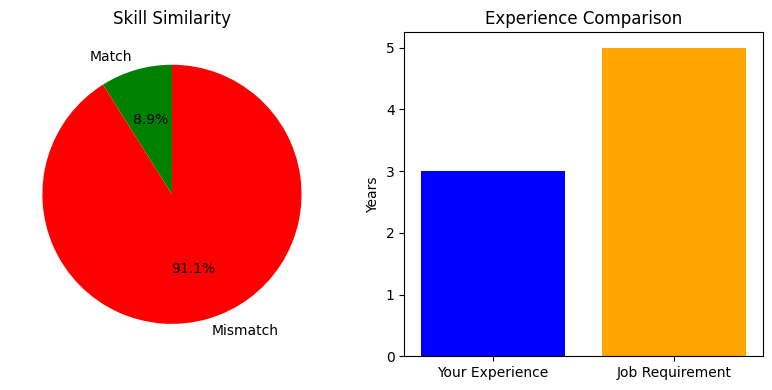

In [ ]:
if not selected_job.empty:
    # Visualisasi kecocokan skill dan pengalaman
    plt.figure(figsize=(8, 4))

    # Skill Similarity sebagai Pie Chart
    plt.subplot(1, 2, 1)
    plt.pie([skill_similarity_score, 1 - skill_similarity_score], labels=['Match', 'Mismatch'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
    plt.title('Skill Similarity')

    # Experience Difference sebagai Bar Plot
    plt.subplot(1, 2, 2)
    plt.bar(['Your Experience', 'Job Requirement'], [user_experience, job_experience_required], color=['blue', 'orange'])
    plt.title('Experience Comparison')
    plt.ylabel('Years')

    plt.tight_layout()
    plt.show()


In [ ]:
def recommend_roles(df_sorted):
  """Recommends job roles based on skill similarity and experience difference."""
  recommended_roles = []
  for index, row in df_sorted.iterrows():
      if row['Skill_Similarity'] >= 0.7 and row['Experience_Diff'] <= 2:
          recommended_roles.append(row['Job_Role'])
          return recommended_roles  # Hanya merekomendasikan 1 role jika syarat terpenuhi

  # Jika tidak ada yang memenuhi syarat, kembalikan daftar kosong
  return recommended_roles

# Contoh penggunaan
recommended_roles_list = recommend_roles(df_sorted)
if recommended_roles_list:
    print(f"Recommended Role: {recommended_roles_list[0]}")
else:
    print("Tidak ada role yang direkomendasikan berdasarkan syarat yang ditentukan.")


Recommended Role: AI/ML Developer
